# Data analysis

## Import packages and files

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
clinical_data = "../dataset_riemer_lastrevision_february27th.xlsx"
clinical_data_explanations = "../explanations_riemer_lastrevision_february27th.xlsx"
mri_data = "../results_0903.csv"

## Clinical data

In [153]:
df_clinical_explanations = pd.read_excel(clinical_data_explanations)
df_clinical = pd.read_excel(clinical_data, header=None, index_col=[0,1])
df_clinical.columns = df_clinical_explanations.columns[2:]
df_clinical.head()

,,status,gender,yearofbirth,ageatbaseline,yearofdiagnosis,ageatonset_diagnosis,ageatonset_symptoms,diseaseduration,mdsupdrsI,mdsupdrsII,mdsupdrsIIIcalc,mdsupdrsIV,mdsupdrstotalcalc,tdpigdphenotype,hoehnyahr,mdsnmstotal,mdsnmsnmf,moca,bsit
0,1,,,,,,,,,,,,,,,,,,,
01-0002,01-0002,control,female,1954,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,11.0
01-0003,01-0003,patient,female,1959,62,2017.0,58.0,57.0,50.0,12.0,4.0,13.0,7.0,36.0,td,2.0,NaN,NaN,25.0,7.0
01-0004,01-0004,control,male,1957,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,10.0
01-0005,01-0005,patient,female,1952,68,2016.0,64.0,61.0,84.0,4.0,9.0,28.0,1.0,42.0,pigd,3.0,NaN,NaN,27.0,6.0
01-0006,01-0006,patient,female,1960,61,2017.0,57.0,58.0,36.0,6.0,3.0,29.0,0.0,38.0,td,2.0,NaN,NaN,27.0,5.0


In [154]:
df_clinical.shape

(81, 19)

In [155]:
df_clinical.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 81 entries, ('01-0002', '01-0002') to ('02-0028', '02-0028')
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   status                81 non-null     object 
 1   gender                81 non-null     object 
 2   yearofbirth           81 non-null     int64  
 3   ageatbaseline         81 non-null     int64  
 4   yearofdiagnosis       38 non-null     float64
 5   ageatonset_diagnosis  38 non-null     float64
 6   ageatonset_symptoms   54 non-null     float64
 7   diseaseduration       54 non-null     float64
 8   mdsupdrsI             53 non-null     float64
 9   mdsupdrsII            53 non-null     float64
 10  mdsupdrsIIIcalc       56 non-null     float64
 11  mdsupdrsIV            55 non-null     float64
 12  mdsupdrstotalcalc     51 non-null     float64
 13  tdpigdphenotype       54 non-null     object 
 14  hoehnyahr             56 non-null  

In [156]:
df_clinical.describe()

,yearofbirth,ageatbaseline,yearofdiagnosis,ageatonset_diagnosis,ageatonset_symptoms,diseaseduration,mdsupdrsI,mdsupdrsII,mdsupdrsIIIcalc,mdsupdrsIV,mdsupdrstotalcalc,hoehnyahr,mdsnmstotal,mdsnmsnmf,moca,bsit
count,81.000000,81.000000,38.000000,38.000000,54.000000,54.000000,53.000000,53.000000,56.000000,55.000000,51.000000,56.000000,52.000000,52.000000,78.000000,76.000000
mean,1952.864198,68.197531,2016.368421,64.500000,62.351852,74.981481,8.886792,8.471698,26.035714,2.309091,44.941176,1.982143,52.596154,0.538462,24.615385,7.157895
std,9.200208,9.117867,3.730235,9.457587,8.906553,40.300050,4.689023,5.849404,10.832551,2.949405,16.513524,0.485838,34.348422,1.552500,3.342877,2.828675
min,1936.000000,32.000000,2002.000000,30.000000,29.000000,14.000000,2.000000,1.000000,4.000000,0.000000,12.000000,1.000000,7.000000,0.000000,15.000000,0.000000
25%,1946.000000,63.000000,2015.000000,58.500000,58.000000,47.250000,5.000000,4.000000,19.750000,0.000000,36.000000,2.000000,28.500000,0.000000,23.000000,5.000000
50%,1952.000000,69.000000,2017.000000,64.000000,62.000000,69.000000,7.000000,7.000000,25.000000,1.000000,41.000000,2.000000,47.000000,0.000000,25.000000,8.000000
75%,1959.000000,75.000000,2019.000000,71.750000,69.000000,84.000000,12.000000,12.000000,30.250000,4.000000,56.000000,2.000000,64.250000,0.000000,27.000000,9.250000
max,1989.000000,84.000000,2020.000000,79.000000,77.000000,228.000000,23.000000,24.000000,57.000000,9.000000,90.000000,3.000000,181.000000,6.000000,31.000000,11.000000


In [157]:
df_clinical.isnull().sum()

status                   0
gender                   0
yearofbirth              0
ageatbaseline            0
yearofdiagnosis         43
ageatonset_diagnosis    43
ageatonset_symptoms     27
diseaseduration         27
mdsupdrsI               28
mdsupdrsII              28
mdsupdrsIIIcalc         25
mdsupdrsIV              26
mdsupdrstotalcalc       30
tdpigdphenotype         27
hoehnyahr               25
mdsnmstotal             29
mdsnmsnmf               29
moca                     3
bsit                     5
dtype: int64

<AxesSubplot:>

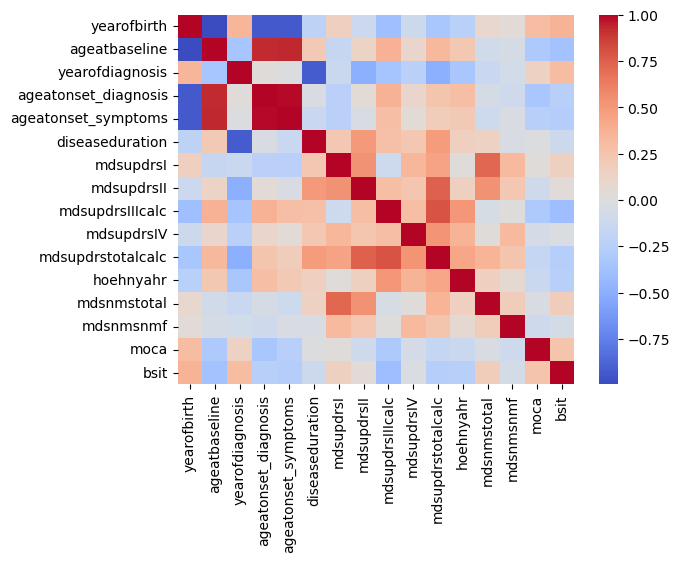

In [158]:
corr = df_clinical.corr()
sns.heatmap(corr, cmap="coolwarm")

In [159]:
df_clinical.index = df_clinical.index.droplevel(1)
df_clinical.head()

,status,gender,yearofbirth,ageatbaseline,yearofdiagnosis,ageatonset_diagnosis,ageatonset_symptoms,diseaseduration,mdsupdrsI,mdsupdrsII,mdsupdrsIIIcalc,mdsupdrsIV,mdsupdrstotalcalc,tdpigdphenotype,hoehnyahr,mdsnmstotal,mdsnmsnmf,moca,bsit
0,,,,,,,,,,,,,,,,,,,
01-0002,control,female,1954,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,11.0
01-0003,patient,female,1959,62,2017.0,58.0,57.0,50.0,12.0,4.0,13.0,7.0,36.0,td,2.0,NaN,NaN,25.0,7.0
01-0004,control,male,1957,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,10.0
01-0005,patient,female,1952,68,2016.0,64.0,61.0,84.0,4.0,9.0,28.0,1.0,42.0,pigd,3.0,NaN,NaN,27.0,6.0
01-0006,patient,female,1960,61,2017.0,57.0,58.0,36.0,6.0,3.0,29.0,0.0,38.0,td,2.0,NaN,NaN,27.0,5.0


## MRI data

In [160]:
df_mri = pd.read_csv(mri_data, index_col=[0,1])
df_mri.head()

,,SN CROWN_PD_MAP,SN_R CROWN_PD_MAP,SN_L CROWN_PD_MAP,LC CROWN_PD_MAP,LC_R CROWN_PD_MAP,LC_L CROWN_PD_MAP,SN CROWN_R2S,SN_R CROWN_R2S,SN_L CROWN_R2S,LC CROWN_R2S,...,SN_L tSWI_mIP_ECHO-3_e3,LC tSWI_mIP_ECHO-3_e3,LC_R tSWI_mIP_ECHO-3_e3,LC_L tSWI_mIP_ECHO-3_e3,SN tSWIhpf_ECHO-3_e3,SN_R tSWIhpf_ECHO-3_e3,SN_L tSWIhpf_ECHO-3_e3,LC tSWIhpf_ECHO-3_e3,LC_R tSWIhpf_ECHO-3_e3,LC_L tSWIhpf_ECHO-3_e3
personal_id,patient_id,,,,,,,,,,,,,,,,,,,,,
01-0002,0000997A,668.026,671.701887,663.880851,651.250000,655.157143,647.342857,2438.932,2515.554717,2352.527660,1935.878571,...,111.425532,160.832143,153.750000,167.914286,155.772,144.615094,168.353191,194.482143,181.614286,207.350000
01-0003,0000991B,686.626,685.528302,687.863830,752.417857,682.478571,822.357143,2633.706,2491.939623,2793.570213,1462.132143,...,58.177489,161.796429,170.814286,152.778571,133.094,146.867925,117.561702,209.310714,209.642857,208.978571
01-0004,0000DAD2,645.394,642.109434,649.097872,680.275000,632.528571,728.021429,2508.046,2494.252830,2523.600000,1761.267857,...,112.655319,156.225000,157.242857,155.207143,172.140,176.569811,167.144681,235.475000,234.142857,236.807143
01-0005,00006431,675.596,664.422642,688.195745,676.385714,646.214286,706.557143,2759.596,3091.849057,2384.927660,1703.603571,...,97.812766,144.135714,153.821429,134.450000,123.322,92.803774,157.736170,209.689286,217.007143,202.371429
01-0006,00001573,700.828,698.554717,703.391489,690.596429,698.714286,682.478571,2285.446,2470.350943,2076.936170,1748.796429,...,119.812766,165.957143,169.357143,162.557143,163.962,145.977358,184.242553,217.939286,220.164286,215.714286


In [161]:
df_mri.shape

(81, 228)

In [162]:
df_mri.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 81 entries, ('01-0002', '0000997A') to ('02-0028', '00008289')
Columns: 228 entries, SN CROWN_PD_MAP to LC_L tSWIhpf_ECHO-3_e3
dtypes: float64(228)
memory usage: 149.9+ KB


In [163]:
df_mri.describe()

,SN CROWN_PD_MAP,SN_R CROWN_PD_MAP,SN_L CROWN_PD_MAP,LC CROWN_PD_MAP,LC_R CROWN_PD_MAP,LC_L CROWN_PD_MAP,SN CROWN_R2S,SN_R CROWN_R2S,SN_L CROWN_R2S,LC CROWN_R2S,...,SN_L tSWI_mIP_ECHO-3_e3,LC tSWI_mIP_ECHO-3_e3,LC_R tSWI_mIP_ECHO-3_e3,LC_L tSWI_mIP_ECHO-3_e3,SN tSWIhpf_ECHO-3_e3,SN_R tSWIhpf_ECHO-3_e3,SN_L tSWIhpf_ECHO-3_e3,LC tSWIhpf_ECHO-3_e3,LC_R tSWIhpf_ECHO-3_e3,LC_L tSWIhpf_ECHO-3_e3
count,81.00000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,654.56958,647.831027,662.168374,714.262963,698.254233,730.271693,2583.761259,2630.246541,2531.341686,1556.685406,...,95.960143,163.594751,163.923280,163.264462,153.811136,150.563056,157.473864,225.000220,224.926984,225.073457
std,28.00882,32.621093,29.200748,46.538495,54.662834,60.573474,366.767828,412.180181,365.434541,260.481054,...,28.562342,18.207710,19.962898,19.522559,21.652364,24.327637,23.156546,18.559595,20.094614,19.777096
min,581.95400,561.218868,599.561702,614.496429,616.214286,605.614286,2038.690000,1910.143396,1975.297872,1054.525000,...,27.515837,105.956989,86.000000,99.164286,96.878000,92.803774,91.676596,166.528571,164.842857,168.214286
25%,634.59800,623.716981,637.591489,680.275000,657.864286,682.792857,2331.340000,2373.403774,2250.697872,1368.192857,...,74.774468,156.892857,153.821429,155.421429,141.552000,136.203774,140.574468,212.232143,210.985714,211.142857
50%,653.91400,648.033962,660.280851,715.021429,683.864286,734.878571,2495.990000,2554.807547,2456.259574,1514.414286,...,99.485106,165.232143,165.514286,166.157143,154.388000,148.426415,159.944681,228.750000,227.400000,227.657143
75%,677.98800,672.743396,688.127660,744.553571,730.671429,764.207143,2759.596000,2821.475472,2760.340426,1748.796429,...,115.842553,175.814286,175.685714,175.478571,168.246000,168.343396,171.629787,238.303571,238.214286,237.114286
max,707.53000,712.996226,716.076596,827.271429,885.342857,840.450000,4069.650000,4242.328302,3874.927660,2134.871429,...,177.195745,209.914286,205.221429,214.607143,202.240000,206.671698,213.374468,261.146429,264.878571,272.492857


In [164]:
df_mri.isnull().sum()

SN CROWN_PD_MAP           0
SN_R CROWN_PD_MAP         0
SN_L CROWN_PD_MAP         0
LC CROWN_PD_MAP           0
LC_R CROWN_PD_MAP         0
                         ..
SN_R tSWIhpf_ECHO-3_e3    0
SN_L tSWIhpf_ECHO-3_e3    0
LC tSWIhpf_ECHO-3_e3      0
LC_R tSWIhpf_ECHO-3_e3    0
LC_L tSWIhpf_ECHO-3_e3    0
Length: 228, dtype: int64

<AxesSubplot:>

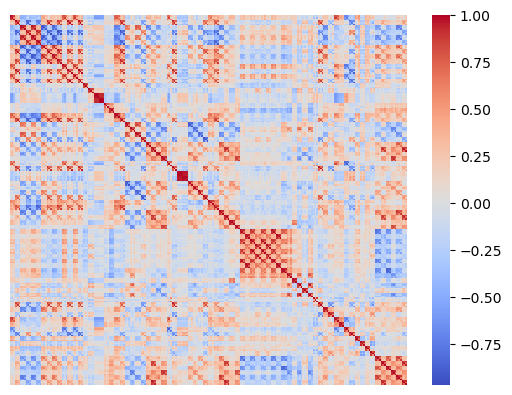

In [165]:
corr = df_mri.corr()
sns.heatmap(corr, cmap="coolwarm", xticklabels=False, yticklabels=False)

In [166]:
df_mri.index = df_mri.index.droplevel(1)
df_mri.head()

,SN CROWN_PD_MAP,SN_R CROWN_PD_MAP,SN_L CROWN_PD_MAP,LC CROWN_PD_MAP,LC_R CROWN_PD_MAP,LC_L CROWN_PD_MAP,SN CROWN_R2S,SN_R CROWN_R2S,SN_L CROWN_R2S,LC CROWN_R2S,...,SN_L tSWI_mIP_ECHO-3_e3,LC tSWI_mIP_ECHO-3_e3,LC_R tSWI_mIP_ECHO-3_e3,LC_L tSWI_mIP_ECHO-3_e3,SN tSWIhpf_ECHO-3_e3,SN_R tSWIhpf_ECHO-3_e3,SN_L tSWIhpf_ECHO-3_e3,LC tSWIhpf_ECHO-3_e3,LC_R tSWIhpf_ECHO-3_e3,LC_L tSWIhpf_ECHO-3_e3
personal_id,,,,,,,,,,,,,,,,,,,,,
01-0002,668.026,671.701887,663.880851,651.250000,655.157143,647.342857,2438.932,2515.554717,2352.527660,1935.878571,...,111.425532,160.832143,153.750000,167.914286,155.772,144.615094,168.353191,194.482143,181.614286,207.350000
01-0003,686.626,685.528302,687.863830,752.417857,682.478571,822.357143,2633.706,2491.939623,2793.570213,1462.132143,...,58.177489,161.796429,170.814286,152.778571,133.094,146.867925,117.561702,209.310714,209.642857,208.978571
01-0004,645.394,642.109434,649.097872,680.275000,632.528571,728.021429,2508.046,2494.252830,2523.600000,1761.267857,...,112.655319,156.225000,157.242857,155.207143,172.140,176.569811,167.144681,235.475000,234.142857,236.807143
01-0005,675.596,664.422642,688.195745,676.385714,646.214286,706.557143,2759.596,3091.849057,2384.927660,1703.603571,...,97.812766,144.135714,153.821429,134.450000,123.322,92.803774,157.736170,209.689286,217.007143,202.371429
01-0006,700.828,698.554717,703.391489,690.596429,698.714286,682.478571,2285.446,2470.350943,2076.936170,1748.796429,...,119.812766,165.957143,169.357143,162.557143,163.962,145.977358,184.242553,217.939286,220.164286,215.714286


## Combined data

In [167]:
df_total = pd.concat([df_clinical, df_mri], axis=1)
df_total.head()

,status,gender,yearofbirth,ageatbaseline,yearofdiagnosis,ageatonset_diagnosis,ageatonset_symptoms,diseaseduration,mdsupdrsI,mdsupdrsII,...,SN_L tSWI_mIP_ECHO-3_e3,LC tSWI_mIP_ECHO-3_e3,LC_R tSWI_mIP_ECHO-3_e3,LC_L tSWI_mIP_ECHO-3_e3,SN tSWIhpf_ECHO-3_e3,SN_R tSWIhpf_ECHO-3_e3,SN_L tSWIhpf_ECHO-3_e3,LC tSWIhpf_ECHO-3_e3,LC_R tSWIhpf_ECHO-3_e3,LC_L tSWIhpf_ECHO-3_e3
01-0002,control,female,1954,67,NaN,NaN,NaN,NaN,NaN,NaN,...,111.425532,160.832143,153.750000,167.914286,155.772,144.615094,168.353191,194.482143,181.614286,207.350000
01-0003,patient,female,1959,62,2017.0,58.0,57.0,50.0,12.0,4.0,...,58.177489,161.796429,170.814286,152.778571,133.094,146.867925,117.561702,209.310714,209.642857,208.978571
01-0004,control,male,1957,63,NaN,NaN,NaN,NaN,NaN,NaN,...,112.655319,156.225000,157.242857,155.207143,172.140,176.569811,167.144681,235.475000,234.142857,236.807143
01-0005,patient,female,1952,68,2016.0,64.0,61.0,84.0,4.0,9.0,...,97.812766,144.135714,153.821429,134.450000,123.322,92.803774,157.736170,209.689286,217.007143,202.371429
01-0006,patient,female,1960,61,2017.0,57.0,58.0,36.0,6.0,3.0,...,119.812766,165.957143,169.357143,162.557143,163.962,145.977358,184.242553,217.939286,220.164286,215.714286


In [168]:
df_total.shape

(81, 247)

In [169]:
df_total.value_counts("tdpigdphenotype")

tdpigdphenotype
pigd             28
td               21
indeterminate     5
dtype: int64

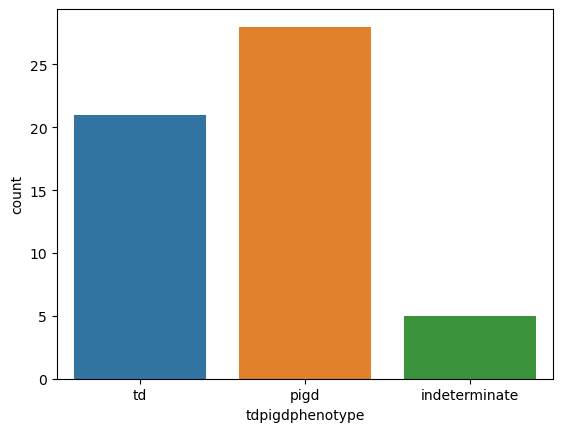

In [179]:
sns.countplot(x='tdpigdphenotype', data=df_total)
plt.show()

In [180]:
df_total['tdpigdphenotype'] = df_total['tdpigdphenotype'].fillna('HC')
df_total['tdpigdphenotype'].replace(['td', 'pigd', 'indeterminate'], ['TD', 'PIGD', 'Indeterminate'], inplace=True)
df_total.value_counts("tdpigdphenotype")

tdpigdphenotype
PIGD             28
HC               27
TD               21
Indeterminate     5
dtype: int64

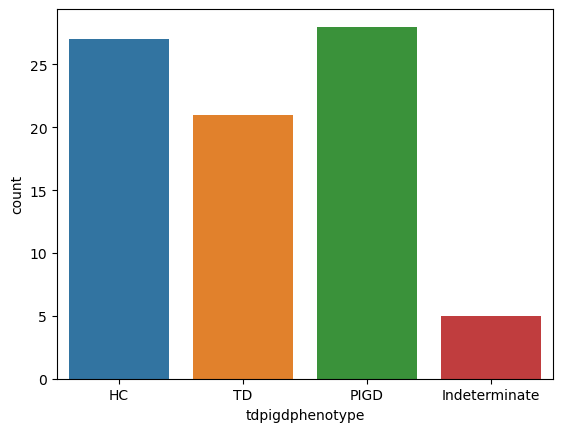

In [181]:
sns.countplot(x='tdpigdphenotype', data=df_total)
plt.show()

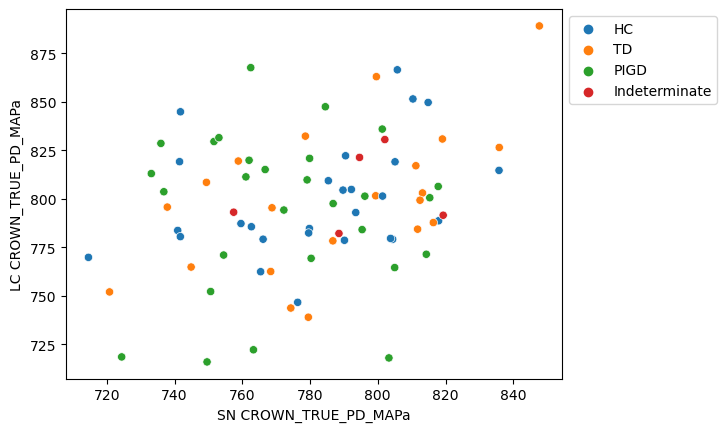

In [186]:
sns.scatterplot(x='SN CROWN_TRUE_PD_MAPa', y='LC CROWN_TRUE_PD_MAPa', hue='tdpigdphenotype', data=df_total)
df_total["SN CROWN_TRUE_PD_MAPa"]
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

personal_id
01-0002    668.026
01-0003    686.626
01-0004    645.394
01-0005    675.596
01-0006    700.828
            ...   
02-0012    648.066
02-0021    663.218
02-0023    644.144
02-0024    680.552
02-0028    658.166
Name: SN CROWN_PD_MAP, Length: 81, dtype: float64


ValueError: Could not interpret value `tdpigdphenotype` for parameter `hue`

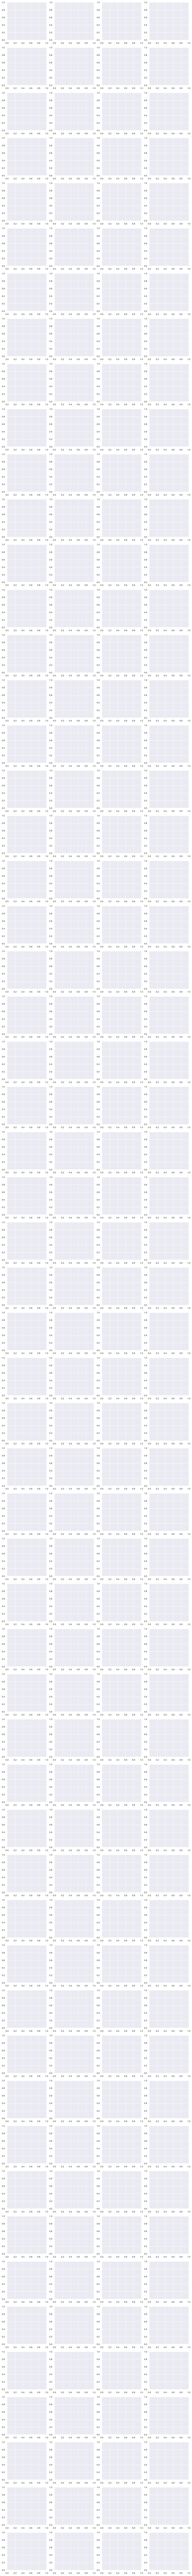

In [200]:
sns.set(font_scale=0.9)
fig, axes = plt.subplots(57, 4, figsize=(14,199.5))
print(df_mri.iloc[:,0])
for j in range(57):
    for i in range(4):
        sns.scatterplot(ax=axes[j,i], x=np.linspace(0, len(df_mri), len(df_mri)), y=df_mri.iloc[:,4*j+i+1])
        axes[j,i].set_title(df_mri.columns[4*j+i+2], size=10)

# Old script

In [173]:
df = pd.read_excel("../dataset_riemer_lastrevision_february27th.xlsx", header=None)
print(df.head())

        0        1        2       3     4   5       6     7     8     9   ...  \
0  01-0002  01-0002  control  female  1954  67     NaN   NaN   NaN   NaN  ...   
1  01-0003  01-0003  patient  female  1959  62  2017.0  58.0  57.0  50.0  ...   
2  01-0004  01-0004  control    male  1957  63     NaN   NaN   NaN   NaN  ...   
3  01-0005  01-0005  patient  female  1952  68  2016.0  64.0  61.0  84.0  ...   
4  01-0006  01-0006  patient  female  1960  61  2017.0  57.0  58.0  36.0  ...   

    11    12   13    14    15   16  17  18    19    20  
0  NaN   NaN  NaN   NaN   NaN  NaN NaN NaN  28.0  11.0  
1  4.0  13.0  7.0  36.0    td  2.0 NaN NaN  25.0   7.0  
2  NaN   NaN  NaN   NaN   NaN  NaN NaN NaN  27.0  10.0  
3  9.0  28.0  1.0  42.0  pigd  3.0 NaN NaN  27.0   6.0  
4  3.0  29.0  0.0  38.0    td  2.0 NaN NaN  27.0   5.0  

[5 rows x 21 columns]


In [174]:
status = df.iloc[:,2]
gender = df.iloc[:,3]
age = df.iloc[:,5]
n_controls = 0
n_patients = 0
n_females = 0
n_males = 0
n_female_patients = 0
n_male_patients = 0
n_female_controls = 0
n_male_controls = 0
age_controls = []
age_patients = []
for index, participant in enumerate(status):
    if participant == "control":
        n_controls += 1
        if gender[index] == "female":
            n_female_controls += 1
        else:
            n_male_controls += 1
        age_controls.append(age[index])
    else:
        n_patients += 1
        if gender[index] == "female":
            n_female_patients += 1
        else:
            n_male_patients += 1
        age_patients.append(age[index])

    if gender[index] == "female":
        n_females += 1
    else:
        n_males += 1

mean_age_patients = np.mean(age_patients)
mean_age_controls = np.mean(age_controls)
std_age_patients = np.std(age_patients)
std_age_controls = np.std(age_controls)
min_age_patients = np.min(age_patients)
max_age_patients = np.max(age_patients)
min_age_controls = np.min(age_controls)
max_age_controls = np.max(age_controls)

print(f"Number of participants: {n_patients+n_controls}")
print()
print(f"Number of females: {n_females}")
print(f"Number of males: {n_males}")
print()
print(f"Number of patients: {n_patients}")
print(f"Mean age patients: {mean_age_patients}")
print(f"Standard deviation age patients: {std_age_patients}")
print(f"Minimum age patients: {min_age_patients}")
print(f"Maximum age patients: {max_age_patients}")
print(f"Number of female patients: {n_female_patients}")
print(f"Percentage female patients: {100*n_female_patients/n_patients}")
print(f"Number of male patients: {n_male_patients}")
print(f"Percentage male patients: {100*n_male_patients/n_patients}")
print()
print(f"Number of controls: {n_controls}")
print(f"Mean age controls: {mean_age_controls}")
print(f"Standard deviation age controls: {std_age_controls}")
print(f"Minimum age controls: {min_age_controls}")
print(f"Maximum age controls: {max_age_controls}")
print(f"Number of female controls: {n_female_controls}")
print(f"Percentage female controls: {100*n_female_controls/n_controls}")
print(f"Number of male controls: {n_male_controls}")
print(f"Percentage male controls: {100*n_male_controls/n_controls}")



Number of participants: 81

Number of females: 36
Number of males: 45

Number of patients: 60
Mean age patients: 69.06666666666666
Standard deviation age patients: 8.71754297698357
Minimum age patients: 32
Maximum age patients: 84
Number of female patients: 23
Percentage female patients: 38.333333333333336
Number of male patients: 37
Percentage male patients: 61.666666666666664

Number of controls: 21
Mean age controls: 65.71428571428571
Standard deviation age controls: 9.552575604530546
Minimum age controls: 45
Maximum age controls: 80
Number of female controls: 13
Percentage female controls: 61.904761904761905
Number of male controls: 8
Percentage male controls: 38.095238095238095


In [175]:
age_of_diagnosis = df.iloc[:,7].dropna()
mean_age_of_diagnosis = np.mean(age_of_diagnosis)
std_age_of_diagnosis = np.std(age_of_diagnosis)
min_age_of_diagnosis = np.min(age_of_diagnosis)
max_age_of_diagnosis = np.max(age_of_diagnosis)
print(f"Mean age at diagnosis: {mean_age_of_diagnosis}")
print(f"Standard deviation age at diagnosis: {std_age_of_diagnosis}")
print(f"Minimum age at diagnosis: {min_age_of_diagnosis}")
print(f"Maximum age at diagnosis: {max_age_of_diagnosis}")

age_of_symptoms = df.iloc[:,8].dropna()
mean_age_of_symptoms = np.mean(age_of_symptoms)
std_age_of_symptoms = np.std(age_of_symptoms)
min_age_of_symptoms = np.min(age_of_symptoms)
max_age_of_symptoms = np.max(age_of_symptoms)
print()
print(f"Mean age at symptom onset: {mean_age_of_symptoms}")
print(f"Standard deviation age at symptom onset: {std_age_of_symptoms}")
print(f"Minimum age at symptom onset: {min_age_of_symptoms}")
print(f"Maximum age at symptom onset: {max_age_of_symptoms}")

# Disease duration (motor symptoms) in years
disease_duration = df.iloc[:,9].dropna()
mean_disease_duration = np.mean(disease_duration)/12
std_disease_duration = np.std(disease_duration)/12
min_disease_duration = np.min(disease_duration)/12
max_disease_duration = np.max(disease_duration)/12
print()
print(f"Mean disease duration: {mean_disease_duration}")
print(f"Standard deviation disease duration: {std_disease_duration}")
print(f"Minimum disease duration: {min_disease_duration}")
print(f"Maximum disease duration: {max_disease_duration}")

Mean age at diagnosis: 64.5
Standard deviation age at diagnosis: 9.332315107365261
Minimum age at diagnosis: 30.0
Maximum age at diagnosis: 79.0

Mean age at symptom onset: 62.351851851851855
Standard deviation age at symptom onset: 8.82370000373029
Minimum age at symptom onset: 29.0
Maximum age at symptom onset: 77.0

Mean disease duration: 6.2484567901234565
Standard deviation disease duration: 3.3270964313904052
Minimum disease duration: 1.1666666666666667
Maximum disease duration: 19.0


In [176]:
# mds-updrs score
mdsupdrs1 = df.iloc[:,10].dropna()
mean_mdsupdrs1 = np.mean(mdsupdrs1)
std_mdsupdrs1 = np.std(mdsupdrs1)
min_mdsupdrs1 = np.min(mdsupdrs1)
max_mdsupdrs1 = np.max(mdsupdrs1)
print(f"Mean mds-updrs I score: {mean_mdsupdrs1}")
print(f"Standard deviation mds-updrs I score: {std_mdsupdrs1}")
print(f"Minimum mds-updrs I score: {min_mdsupdrs1}")
print(f"Maximum mds-updrs I score: {max_mdsupdrs1}")

mdsupdrs2 = df.iloc[:,11].dropna()
mean_mdsupdrs2 = np.mean(mdsupdrs2)
std_mdsupdrs2 = np.std(mdsupdrs2)
min_mdsupdrs2 = np.min(mdsupdrs2)
max_mdsupdrs2 = np.max(mdsupdrs2)
print()
print(f"Mean mds-updrs II score: {mean_mdsupdrs2}")
print(f"Standard deviation mds-updrs II score: {std_mdsupdrs2}")
print(f"Minimum mds-updrs II score: {min_mdsupdrs2}")
print(f"Maximum mds-updrs II score: {max_mdsupdrs2}")

mdsupdrs3 = df.iloc[:,12].dropna()
mean_mdsupdrs3 = np.mean(mdsupdrs3)
std_mdsupdrs3 = np.std(mdsupdrs3)
min_mdsupdrs3 = np.min(mdsupdrs3)
max_mdsupdrs3 = np.max(mdsupdrs3)
print()
print(f"Mean mds-updrs III score: {mean_mdsupdrs3}")
print(f"Standard deviation mds-updrs III score: {std_mdsupdrs3}")
print(f"Minimum mds-updrs III score: {min_mdsupdrs3}")
print(f"Maximum mds-updrs III score: {max_mdsupdrs3}")

mdsupdrs4 = df.iloc[:,13].dropna()
mean_mdsupdrs4 = np.mean(mdsupdrs4)
std_mdsupdrs4 = np.std(mdsupdrs4)
min_mdsupdrs4 = np.min(mdsupdrs4)
max_mdsupdrs4 = np.max(mdsupdrs4)
print()
print(f"Mean mds-updrs IV score: {mean_mdsupdrs4}")
print(f"Standard deviation mds-updrs IV score: {std_mdsupdrs4}")
print(f"Minimum mds-updrs IV score: {min_mdsupdrs4}")
print(f"Maximum mds-updrs IV score: {max_mdsupdrs4}")

mdsupdrs_tot = df.iloc[:,14].dropna()
mean_mdsupdrs_tot = np.mean(mdsupdrs_tot)
std_mdsupdrs_tot = np.std(mdsupdrs_tot)
min_mdsupdrs_tot = np.min(mdsupdrs_tot)
max_mdsupdrs_tot = np.max(mdsupdrs_tot)
print()
print(f"Mean total mds-updrs score: {mean_mdsupdrs_tot}")
print(f"Standard deviation total mds-updrs score: {std_mdsupdrs_tot}")
print(f"Minimum total mds-updrs score: {min_mdsupdrs_tot}")
print(f"Maximum total mds-updrs score: {max_mdsupdrs_tot}")

Mean mds-updrs I score: 8.88679245283019
Standard deviation mds-updrs I score: 4.644576375907834
Minimum mds-updrs I score: 2.0
Maximum mds-updrs I score: 23.0

Mean mds-updrs II score: 8.471698113207546
Standard deviation mds-updrs II score: 5.793958380950376
Minimum mds-updrs II score: 1.0
Maximum mds-updrs II score: 24.0

Mean mds-updrs III score: 26.035714285714285
Standard deviation mds-updrs III score: 10.735395870194816
Minimum mds-updrs III score: 4.0
Maximum mds-updrs III score: 57.0

Mean mds-updrs IV score: 2.309090909090909
Standard deviation mds-updrs IV score: 2.9224692378673534
Minimum mds-updrs IV score: 0.0
Maximum mds-updrs IV score: 9.0

Mean total mds-updrs score: 44.94117647058823
Standard deviation total mds-updrs score: 16.350825085262766
Minimum total mds-updrs score: 12.0
Maximum total mds-updrs score: 90.0


In [177]:
phenotype = df.iloc[:,15].dropna()
n_td = 0
n_pigd = 0
n_indeterminate = 0
for item in phenotype:
    if item == "td":
        n_td += 1
    elif item == "pigd":
        n_pigd += 1
    else:
        n_indeterminate += 1
print(f"Number with TD motor phenotype: {n_td}")
print(f"Percentage with TD motor phenotype: {100*n_td/len(phenotype)}")
print(f"Number with PIGD motor phenotype: {n_pigd}")
print(f"Percentage with PIGD motor phenotype: {100*n_pigd/len(phenotype)}")
print(f"Number with indeterminate motor phenotype: {n_indeterminate}")
print(f"Percentage with indeterminate motor phenotype: {100*n_indeterminate/len(phenotype)}")

hoenyahr = df.iloc[:,16].dropna()
mean_hoenyahr = np.mean(hoenyahr)
std_hoenyahr = np.std(hoenyahr)
min_hoenyahr = np.min(hoenyahr)
max_hoenyahr = np.max(hoenyahr)
print()
print(f"Mean Hoen & Yahr score: {mean_hoenyahr}")
print(f"Standard deviation Hoen & Yahr score: {std_hoenyahr}")
print(f"Minimum Hoen & Yahr score: {min_hoenyahr}")
print(f"Maximum Hoen & Yahr score: {max_hoenyahr}")

mdsnms_tot = df.iloc[:,17].dropna()
mean_mdsnms_tot = np.mean(mdsnms_tot)
std_mdsnms_tot = np.std(mdsnms_tot)
min_mdsnms_tot = np.min(mdsnms_tot)
max_mdsnms_tot = np.max(mdsnms_tot)
print()
print(f"Mean total MDS-NMS score: {mean_mdsnms_tot}")
print(f"Standard deviation total MDS-NMS score: {std_mdsnms_tot}")
print(f"Minimum total MDS-NMS score: {min_mdsnms_tot}")
print(f"Maximum total MDS-NMS score: {max_mdsnms_tot}")

mdsnms_nmf = df.iloc[:,18].dropna()
mean_mdsnms_nmf = np.mean(mdsnms_nmf)
std_mdsnms_nmf = np.std(mdsnms_nmf)
min_mdsnms_nmf = np.min(mdsnms_nmf)
max_mdsnms_nmf = np.max(mdsnms_nmf)
print()
print(f"Mean total MDS-NMS non-motor fluctuations score: {mean_mdsnms_nmf}")
print(f"Standard deviation total MDS-NMS non-motor fluctuation score: {std_mdsnms_nmf}")
print(f"Minimum total MDS-NMS non-motor fluctuations score: {min_mdsnms_nmf}")
print(f"Maximum total MDS-NMS non-motor fluctuations score: {max_mdsnms_nmf}")

Number with TD motor phenotype: 21
Percentage with TD motor phenotype: 38.888888888888886
Number with PIGD motor phenotype: 28
Percentage with PIGD motor phenotype: 51.851851851851855
Number with indeterminate motor phenotype: 5
Percentage with indeterminate motor phenotype: 9.25925925925926

Mean Hoen & Yahr score: 1.9821428571428572
Standard deviation Hoen & Yahr score: 0.4814810272397415
Minimum Hoen & Yahr score: 1.0
Maximum Hoen & Yahr score: 3.0

Mean total MDS-NMS score: 52.59615384615385
Standard deviation total MDS-NMS score: 34.01654553041042
Minimum total MDS-NMS score: 7.0
Maximum total MDS-NMS score: 181.0

Mean total MDS-NMS non-motor fluctuations score: 0.5384615384615384
Standard deviation total MDS-NMS non-motor fluctuation score: 1.537499699331283
Minimum total MDS-NMS non-motor fluctuations score: 0.0
Maximum total MDS-NMS non-motor fluctuations score: 6.0


In [178]:
moca = df.iloc[:,19].dropna()
mean_moca = np.mean(moca)
std_moca = np.std(moca)
min_moca = np.min(moca)
max_moca = np.max(moca)
print(f"Mean MOCA score: {mean_moca}")
print(f"Standard deviation MOCA score: {std_moca}")
print(f"Minimum MOCA score: {min_moca}")
print(f"Maximum MOCA score: {max_moca}")

bsit = df.iloc[:,20].dropna()
mean_bsit = np.mean(bsit)
std_bsit = np.std(bsit)
min_bsit = np.min(bsit)
max_bsit = np.max(bsit)
print()
print(f"Mean B-SIT score: {mean_bsit}")
print(f"Standard deviation B-SIT score: {std_bsit}")
print(f"Minimum B-SIT score: {min_bsit}")
print(f"Maximum B-SIT score: {max_bsit}")

Mean MOCA score: 24.615384615384617
Standard deviation MOCA score: 3.321378958415365
Minimum MOCA score: 15.0
Maximum MOCA score: 31.0

Mean B-SIT score: 7.157894736842105
Standard deviation B-SIT score: 2.8100038938863614
Minimum B-SIT score: 0.0
Maximum B-SIT score: 11.0
